In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Plots

In [3]:
def plot_batch_loss(batch_loss_df):
    plt.figure(figsize=(6, 4))

    plt.plot(batch_loss_df["Step"], batch_loss_df["Value"], label="Batch Loss", c="b")

    plt.title("Train Loss vs Batch Step")
    plt.xlabel("Batch Step")
    plt.ylabel("Batch Training Loss")
    plt.grid()
    plt.figure()
    plt.show()


In [4]:
def plot_losses_vs_epoch(eval_losses, train_losses):
    plt.figure(figsize=(6, 4))

    plt.plot(
        eval_losses["Step"][1:], eval_losses["Value"][1:], label="Eval Loss", c="r"
    )
    plt.plot(train_losses["Step"], train_losses["Value"], label="Train Loss", c="b")

    plt.title("Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.figure()
    plt.show()

In [5]:
def plot_lr(lr_change_df):
    plt.figure(figsize=(6, 4))

    plt.plot(
        lr_change_df["Step"],
        lr_change_df["Value"],
        label="Lr",
        c="g",
        marker="o",
        markersize=3,
    )

    plt.title("Lr History")
    plt.xlabel("Epoch")
    plt.ylabel("Learning Rate")
    plt.grid()
    plt.figure()
    plt.show()

## Transformer result

In [13]:
batch_training_loss_df = pd.read_csv(
    "final_models/transformer/transformer_training_batch_loss.csv"
)

eval_loss_df = pd.read_csv(
    "final_models/transformer/transformer_training_Loss_Eval.csv"
)
train_loss_df = pd.read_csv(
    "final_models/transformer/transformer_training_Loss_Train.csv"
)

lr_change_df = pd.read_csv("final_models/transformer/transformer_training_Fri _LR.csv")

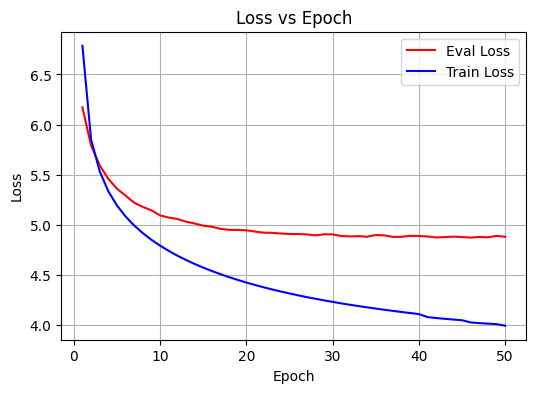

<Figure size 640x480 with 0 Axes>

,Wall time,Step,Value
1,1.761339e+09,1,6.172294
2,1.761340e+09,2,5.793266
3,1.761341e+09,3,5.593965
4,1.761342e+09,4,5.460132
5,1.761342e+09,5,5.361835


In [6]:
plot_losses_vs_epoch(eval_loss_df, train_loss_df)

eval_loss_df[1:].head(5)

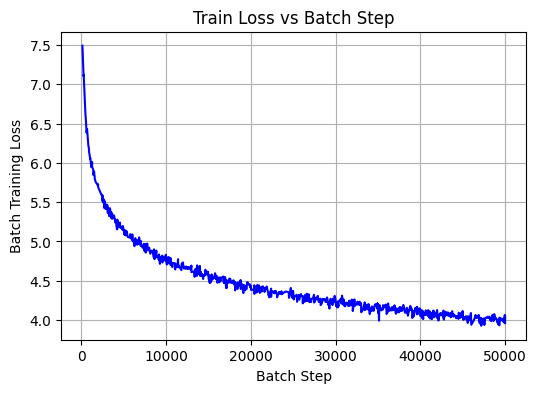

<Figure size 640x480 with 0 Axes>

,Wall time,Step,Value
0,1.761339e+09,108,7.489958
1,1.761339e+09,173,7.297201
2,1.761339e+09,245,7.104380
3,1.761339e+09,260,7.120241
4,1.761339e+09,403,6.773952
5,1.761339e+09,466,6.613501
6,1.761339e+09,511,6.561993
7,1.761339e+09,539,6.510824
8,1.761339e+09,557,6.498967
9,1.761339e+09,597,6.384188


In [7]:
plot_batch_loss(batch_training_loss_df)
batch_training_loss_df.head(10)

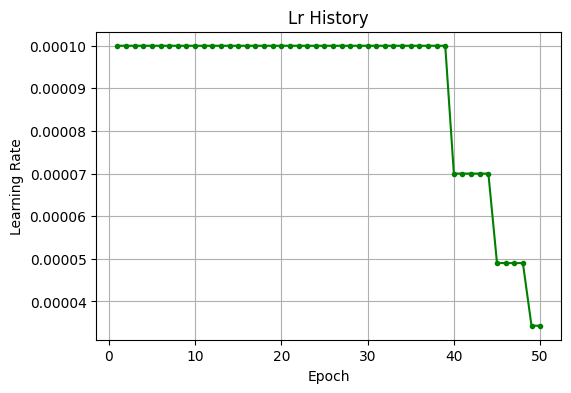

<Figure size 640x480 with 0 Axes>

In [8]:
plot_lr(lr_change_df)

### Lstm

In [8]:
lstm_atch_training_loss_df = pd.read_csv("final_models/lstm/batch_train_loss.csv")

lstm_eval_loss_df = pd.read_csv("final_models/lstm/epoch_eval_loss.csv")
lstm_train_loss_df = pd.read_csv("final_models/lstm/epoch_train_loss.csv")


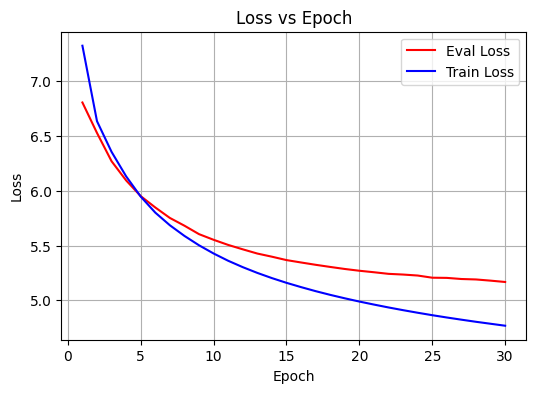

<Figure size 640x480 with 0 Axes>

In [9]:
plot_losses_vs_epoch(lstm_eval_loss_df, lstm_train_loss_df)


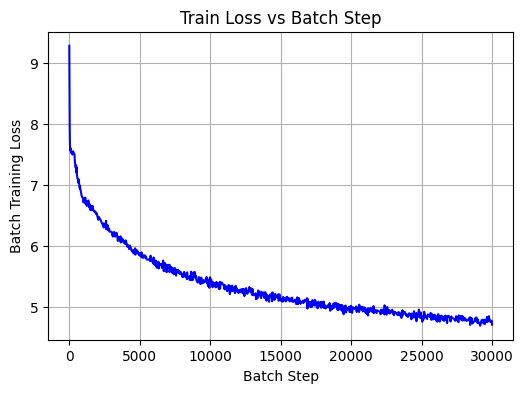

<Figure size 640x480 with 0 Axes>

In [10]:
plot_batch_loss(lstm_atch_training_loss_df)

In [21]:
transformer_batch_training_loss_subset = batch_training_loss_df[
    batch_training_loss_df["Step"] <= 30000
]

transformer_eval_loss__subset = eval_loss_df[eval_loss_df["Step"] <= 30]

transformer_train_loss__subset = train_loss_df[train_loss_df["Step"] <= 30]


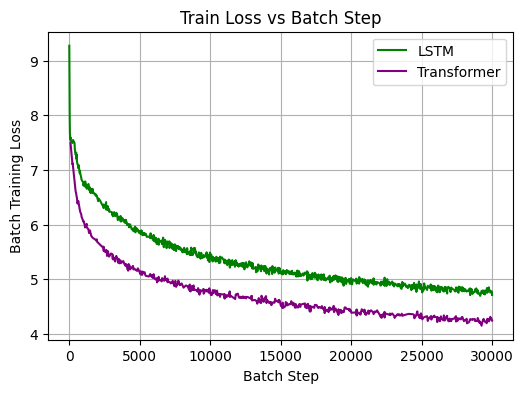

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(6, 4))

plt.plot(
    lstm_atch_training_loss_df["Step"],
    lstm_atch_training_loss_df["Value"],
    label="LSTM",
    c="green",
)

plt.plot(
    transformer_batch_training_loss_subset["Step"],
    transformer_batch_training_loss_subset["Value"],
    label="Transformer",
    c="purple",
)

plt.title("Train Loss vs Batch Step")
plt.xlabel("Batch Step")
plt.ylabel("Batch Training Loss")
plt.grid()
plt.legend()
plt.figure()
plt.show()

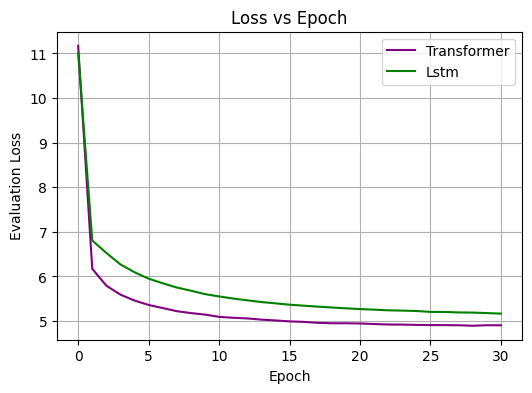

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(6, 4))

plt.plot(
    transformer_eval_loss__subset["Step"],
    transformer_eval_loss__subset["Value"],
    label="Transformer",
    c="purple",
)
plt.plot(
    lstm_eval_loss_df["Step"],
    lstm_eval_loss_df["Value"],
    label="Lstm",
    c="green",
)

plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Evaluation Loss")
plt.grid()
plt.legend()
plt.figure()
plt.show()

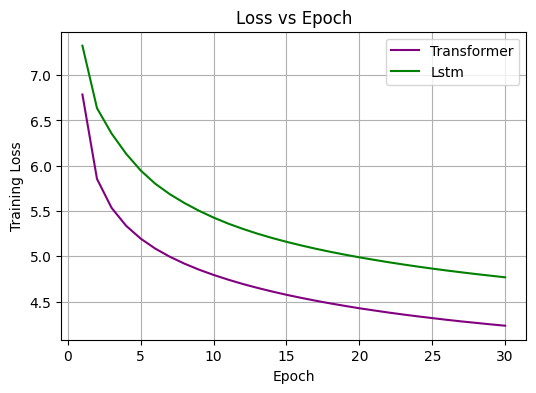

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(6, 4))

plt.plot(
    transformer_train_loss__subset["Step"],
    transformer_train_loss__subset["Value"],
    label="Transformer",
    c="purple",
)
plt.plot(
    lstm_train_loss_df["Step"],
    lstm_train_loss_df["Value"],
    label="Lstm",
    c="green",
)

plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.grid()
plt.legend()
plt.figure()
plt.show()

### Calculatin average batch time

In [1]:
import re


def calculate_batches_avg_time(file_path):
    times = []
    pattern = re.compile(r"Time for last 100 batches:\s*([\d.]+)s")
    with open(file_path, "r") as f:
        for line in f:
            match = pattern.search(line)
            if match:
                times.append(float(match.group(1)))

    if not times:
        raise ValueError("No batch times found in the log file.")

    avg_time = sum(times) / len(times)
    return avg_time

In [6]:
lstm_batch_avg = calculate_batches_avg_time(
    "final_models/lstm/lstm_training_20251025_082701.log"
)

print(f"{lstm_batch_avg:.3f}")

121.154


In [7]:
transformer_batch_avg = calculate_batches_avg_time(
    "final_models/transformer/transformer_training.log"
)

print(f"{transformer_batch_avg:.3f}")

72.383
